In [33]:
#Name:Benson Karanja 
#Project:A HR Analysis model.A logistics Regression Prediction Model
#Type:linear Regression Prediction Model
#Date:17TH NOV 2024.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [35]:
df=pd.read_csv('HR_comma_sep.csv')
df.head(7)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [36]:
df.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [37]:
#Exploratory data analysis
left=df[df.left==1]
left.shape

(3571, 10)

In [38]:
retained=df[df.left==0]
retained.shape

(11428, 10)

<Axes: xlabel='salary'>

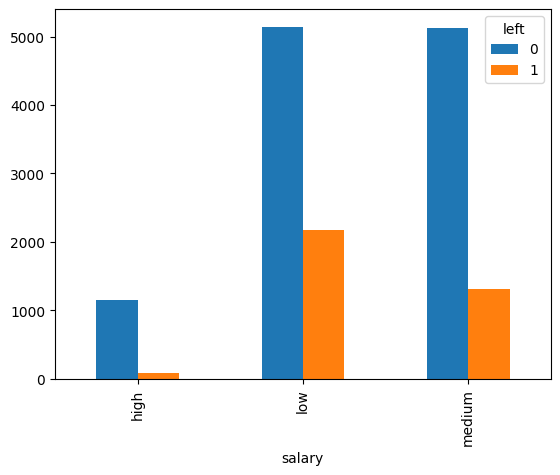

In [39]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

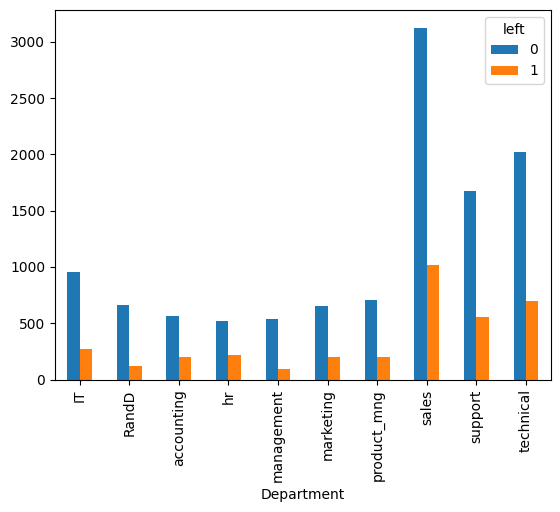

In [40]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [41]:
df.drop(['Department','salary'],axis='columns')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [46]:
df.groupby('left')

In [ ]:
#From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

In [15]:
new_df=df.drop(['last_evaluation','number_project','time_spend_company','Work_accident','Department'],axis='columns')

In [16]:
new_df.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
new_df.salary=le.fit_transform(new_df.salary)
new_df.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,1
1,0.80,262,1,0,2
2,0.11,272,1,0,2
3,0.72,223,1,0,1
4,0.37,159,1,0,1


In [19]:
X=new_df.drop(['left'],axis='columns')
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [20]:
Y=new_df['left']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [22]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
14115,0.16,149,0,2
7925,0.58,192,0,2
2724,0.68,251,0,0
13381,0.93,241,0,2
7527,0.96,257,0,2


In [23]:
X_train.shape

(10499, 4)

In [24]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], shape=(4500,))

In [26]:
model.score(X_test,y_test)

0.7731111111111111

In [27]:
model.predict_proba(X_test)

array([[0.4661935 , 0.5338065 ],
       [0.78314865, 0.21685135],
       [0.81265423, 0.18734577],
       ...,
       [0.90720135, 0.09279865],
       [0.78651484, 0.21348516],
       [0.66783403, 0.33216597]], shape=(4500, 2))

In [28]:
y_pred= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[3199,  180],
       [ 841,  280]])

Text(58.222222222222214, 0.5, 'Truth')

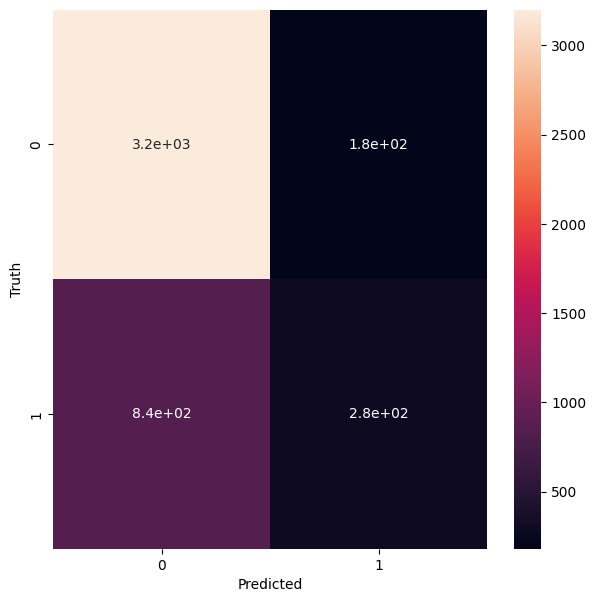

In [29]:
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
import joblib
joblib.dump(model, 'HR_joblib')

['HR_joblib']